In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
import math

In [2]:
ok=False
while ok==False:
    FileName = input('Wpisz ścieżkę do pliku: ')

    try:
        data=pd.read_csv(FileName, header=None) 
        ok=True
    except FileNotFoundError:
        print('Nieprawidłowa ścieżka. Spróbuj ponownie: ')
        ok=False
#C:/Users/Ryzen/Desktop/PUM/FlapPyBird/outfile.csv

Wpisz ścieżkę do pliku: C:/Users/Ryzen/Desktop/PUM/FlapPyBird/outfile.csv


In [3]:
data

,0,1
0,208,121.296296
1,212,121.296296
2,216,121.296296
3,220,121.296296
4,224,121.296296
...,...,...
93,5672,37.962963
94,5676,37.962963
95,5680,37.962963
96,5684,37.962963


In [4]:
X = np.array(data[0])[1:]
Y = np.array(data[1])[1:]

In [5]:
X

array([ 212,  216,  220,  224,  228,  232,  236,  240,  244,  248,  252,
        256,  260,  264,  268,  272,  456,  460,  464,  468,  472,  764,
        768, 1052, 1056, 1060, 1064, 1348, 1352, 1356, 1648, 1652, 1656,
       1928, 1932, 1936, 1940, 2212, 2216, 2220, 2224, 2228, 2508, 2512,
       2516, 2520, 2816, 2820, 2824, 2828, 2832, 3084, 3088, 3092, 3096,
       3100, 3392, 3396, 3400, 3404, 3680, 3684, 3688, 3692, 3972, 3976,
       3980, 3984, 4256, 4260, 4264, 4268, 4272, 4556, 4560, 4564, 4568,
       4572, 4836, 4840, 4844, 4848, 5144, 5148, 5152, 5156, 5160, 5416,
       5420, 5424, 5428, 5432, 5672, 5676, 5680, 5684, 5688], dtype=int64)

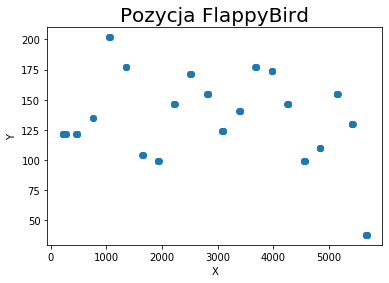

In [6]:
plt.scatter(X.reshape(-1,1),Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pozycja FlappyBird', fontsize=20)
plt.show()

<H5>Wykorzystując sklearn.linear_model.LinearRegression wykonaj regresje na kolejnych zapisanych pozycjach postaci, wykorzystując wielomian jak najniższego rzędu

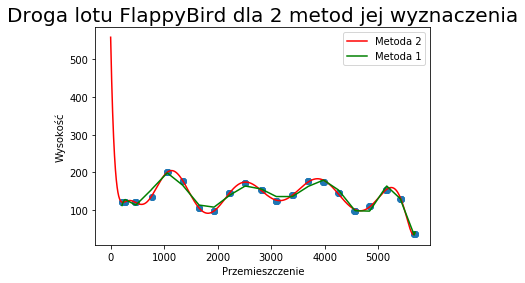

In [7]:
#Metoda 1
x = PolynomialFeatures(degree=11).fit_transform(X.reshape(-1,1))
LinReg = linear_model.LinearRegression(normalize=True)
LinReg.fit(x,Y)
Y_pred = LinReg.predict(x)

#Metoda 2
z=np.polyfit(X,Y,14)
pred=np.poly1d(z)
X_lin_reg = np.linspace(0,X.max(),6000)
Y_lin_reg = pred(X_lin_reg)

plt.scatter(X,Y)
plt.plot(X_lin_reg,Y_lin_reg, color = 'red', label="Metoda 2")
plt.plot(X,Y_pred, c='g', label = "Metoda 1")
plt.title("Droga lotu FlappyBird dla 2 metod jej wyznaczenia", fontsize=20)
plt.ylabel("Wysokość")
plt.xlabel("Przemieszczenie")
plt.legend()

<H5>Na podstawie wyniku wykonanej regresji wygeneruj ścieżkę pozwalającą na osiągnięcie co najmniej 15 punktów

Text(0, 0.5, 'Wysokość')

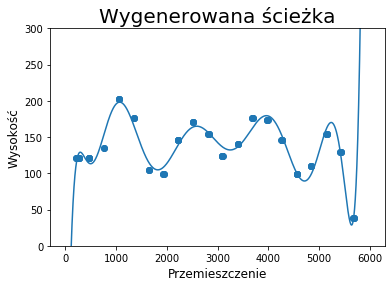

In [8]:
s = np.arange(6000)
s_gen = PolynomialFeatures(degree=11).fit_transform(s.reshape(-1,1))
h = LinReg.predict(s_gen)

plt.scatter(X,Y)
plt.ylim(0,300)
plt.plot(s,h)
plt.title("Wygenerowana ścieżka", fontsize=20)
plt.xlabel("Przemieszczenie", fontsize=12)
plt.ylabel("Wysokość", fontsize=12)

In [9]:
df5 = pd.DataFrame({0:s,1:h})

In [10]:
df5.to_csv('FlapPyBird/try1.csv', columns=(0,1), index=False)

Wygenerowana ścieżka pozwala na osiągnięcie 18 punktów

<H5>Napisz własną implementację regresji liniowej

<H5>Wykorzystując własną implementację regresji liniowej wykonaj regresje na kolejnych zapisanych pozycjach postaci, wykorzystując wielomian jak najniższego rzędu

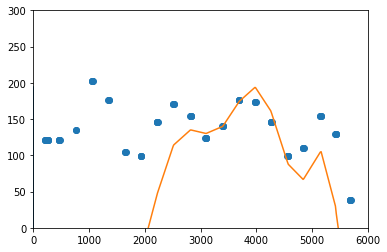

In [11]:
x1 = PolynomialFeatures(degree=11).fit_transform(X.reshape(-1,1))
R1 = np.dot(np.linalg.inv(np.dot(x1.T,x1)), np.dot(x1.T,Y))
Y_predicted1 = np.dot(x1,R1)
%matplotlib inline
plt.scatter(X,Y)
plt.plot(x1,Y_predicted1)
plt.ylim(0,300)
plt.xlim(0,6000)
plt.show()

Ze względu na niedopasowanie wielomianu do zadanych punktów, zebrałam więcej punktów i dopiero na nich przeprowadziłam regresję liniową

In [38]:
ok=False
while ok==False:
    FileName = input('Wpisz ścieżkę do pliku: ')

    try:
        data1=pd.read_csv(FileName, header=None) 
        ok=True
    except FileNotFoundError:
        print('Nieprawidłowa ścieżka. Spróbuj ponownie: ')
        ok=False
#C:/Users/Ryzen/Desktop/PUM/FlapPyBird/outfile2.csv

Wpisz ścieżkę do pliku: C:/Users/Ryzen/Desktop/PUM/FlapPyBird/outfile3.csv


In [39]:
X1 = np.array(data1[0])[1:]
Y1 = np.array(data1[1])[1:]

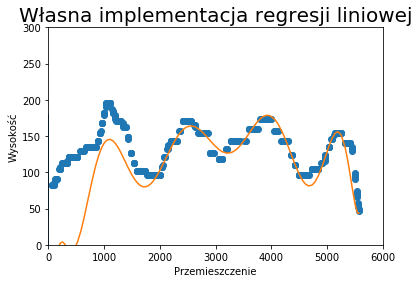

In [40]:
x = PolynomialFeatures(degree=11).fit_transform(X1.reshape(-1,1))
R = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,Y1))
Y_predicted = np.dot(x,R)

plt.scatter(X1,Y1)
plt.plot(x,Y_predicted)
plt.ylim(0,300)
plt.xlim(0,6000)
plt.title("Własna implementacja regresji liniowej", fontsize=20)
plt.ylabel("Wysokość")
plt.xlabel("Przemieszczenie")
plt.show()

Zastosowanie większej liczby punktów pomogło w ukształtowaniu wielomianu, nadal jednak odbiega on od moich oczekiwań - zarówno dla wyżsych jak i niższych stopni wielomianu otrzymywany wynik wygląda jeszcze gorzej. Wynik silnie zależy od próbek.

<H5>Na podstawie wyniku wykonanej regresji wygeneruj ścieżkę pozwalającą na osiągnięcie co najmniej 15 punktów

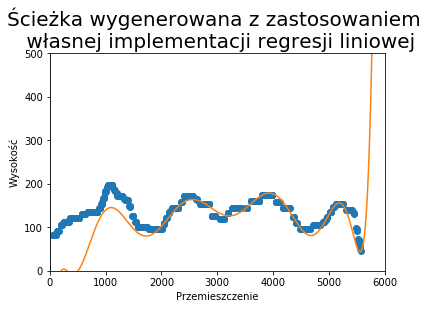

In [41]:
s2 = np.arange(6000)
xs = PolynomialFeatures(degree=11).fit_transform(s2.reshape(-1,1))
Y_pred2 = np.dot(xs,R)

plt.title("Ścieżka wygenerowana z zastosowaniem \n własnej implementacji regresji liniowej", fontsize=20)
plt.ylabel("Wysokość")
plt.xlabel("Przemieszczenie")
plt.scatter(X1,Y1)
plt.plot(xs,Y_pred2)
plt.ylim(0,500)
plt.xlim(0,6000)
plt.show()

In [33]:
df = pd.DataFrame({0:s2,1:Y_pred2})

In [34]:
df.to_csv('FlapPyBird/try2.csv', columns=(0,1), index=False)

<H4> Ćwiczenie 2

In [60]:
ok=False
while ok==False:
    path = input('Wpisz ścieżkę do pliku: ')

    try:
        Portugal_data=pd.read_csv(path)#, header=None) 
        ok=True
    except FileNotFoundError:
        print('Nieprawidłowa ścieżka. Spróbuj ponownie: ')
        ok=False
#C:/Users/Ryzen/Desktop/PUM/ElectionData2019/GoesGold/ElectionData.csv

Wpisz ścieżkę do pliku: C:/Users/Ryzen/Desktop/PUM/ElectionData2019/GoesGold/ElectionData.csv


In [61]:
Portugal_data

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [67]:
data_Terri_Nac = Portugal_data[(Portugal_data.territoryName == 'Território Nacional')]

In [68]:
data_Terri_Nac

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21256,265,2019-10-07 00:35:01,Território Nacional,226,0,3092,3092,129599,2.54,88539,...,57.00,9439701,5380451,PURP,0,0.20,0.21,10424,0,0
21257,265,2019-10-07 00:35:01,Território Nacional,226,0,3092,3092,129599,2.54,88539,...,57.00,9439701,5380451,PDR,0,0.18,0.19,9217,0,0
21258,265,2019-10-07 00:35:01,Território Nacional,226,0,3092,3092,129599,2.54,88539,...,57.00,9439701,5380451,PPM,0,0.15,0.16,7875,0,0
21259,265,2019-10-07 00:35:01,Território Nacional,226,0,3092,3092,129599,2.54,88539,...,57.00,9439701,5380451,PTP,0,0.15,0.15,7499,0,0


<H5>Wykorzystując dane w pliku ElectionData.csv i własną implementację wykonaj regresję na wynikach wyborów każdej z partii dla całego kraju (Territorio Nacional) w funkcji czasu

In [88]:
Parties = data_Terri_Nac.Party
Parties_list = Parties.drop_duplicates()

In [89]:
Parties_list

0            PS
1       PPD/PSD
2          B.E.
3        CDS-PP
4       PCP-PEV
5           PAN
6            CH
7        R.I.R.
8     PCTP/MRPP
9             A
10            L
11           IL
12          JPP
13           NC
14          PDR
15          PNR
16         PURP
17          PPM
18          MPT
19          PTP
20          MAS
Name: Party, dtype: object

In [100]:
#Moja implementacja
def MyLinReg(Degr, X1, Y1):
    x = PolynomialFeatures(degree=Degr).fit_transform(X1.reshape(-1,1))
    R = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,Y1))
    Y_predicted = np.dot(x,R)
    return Y_predicted

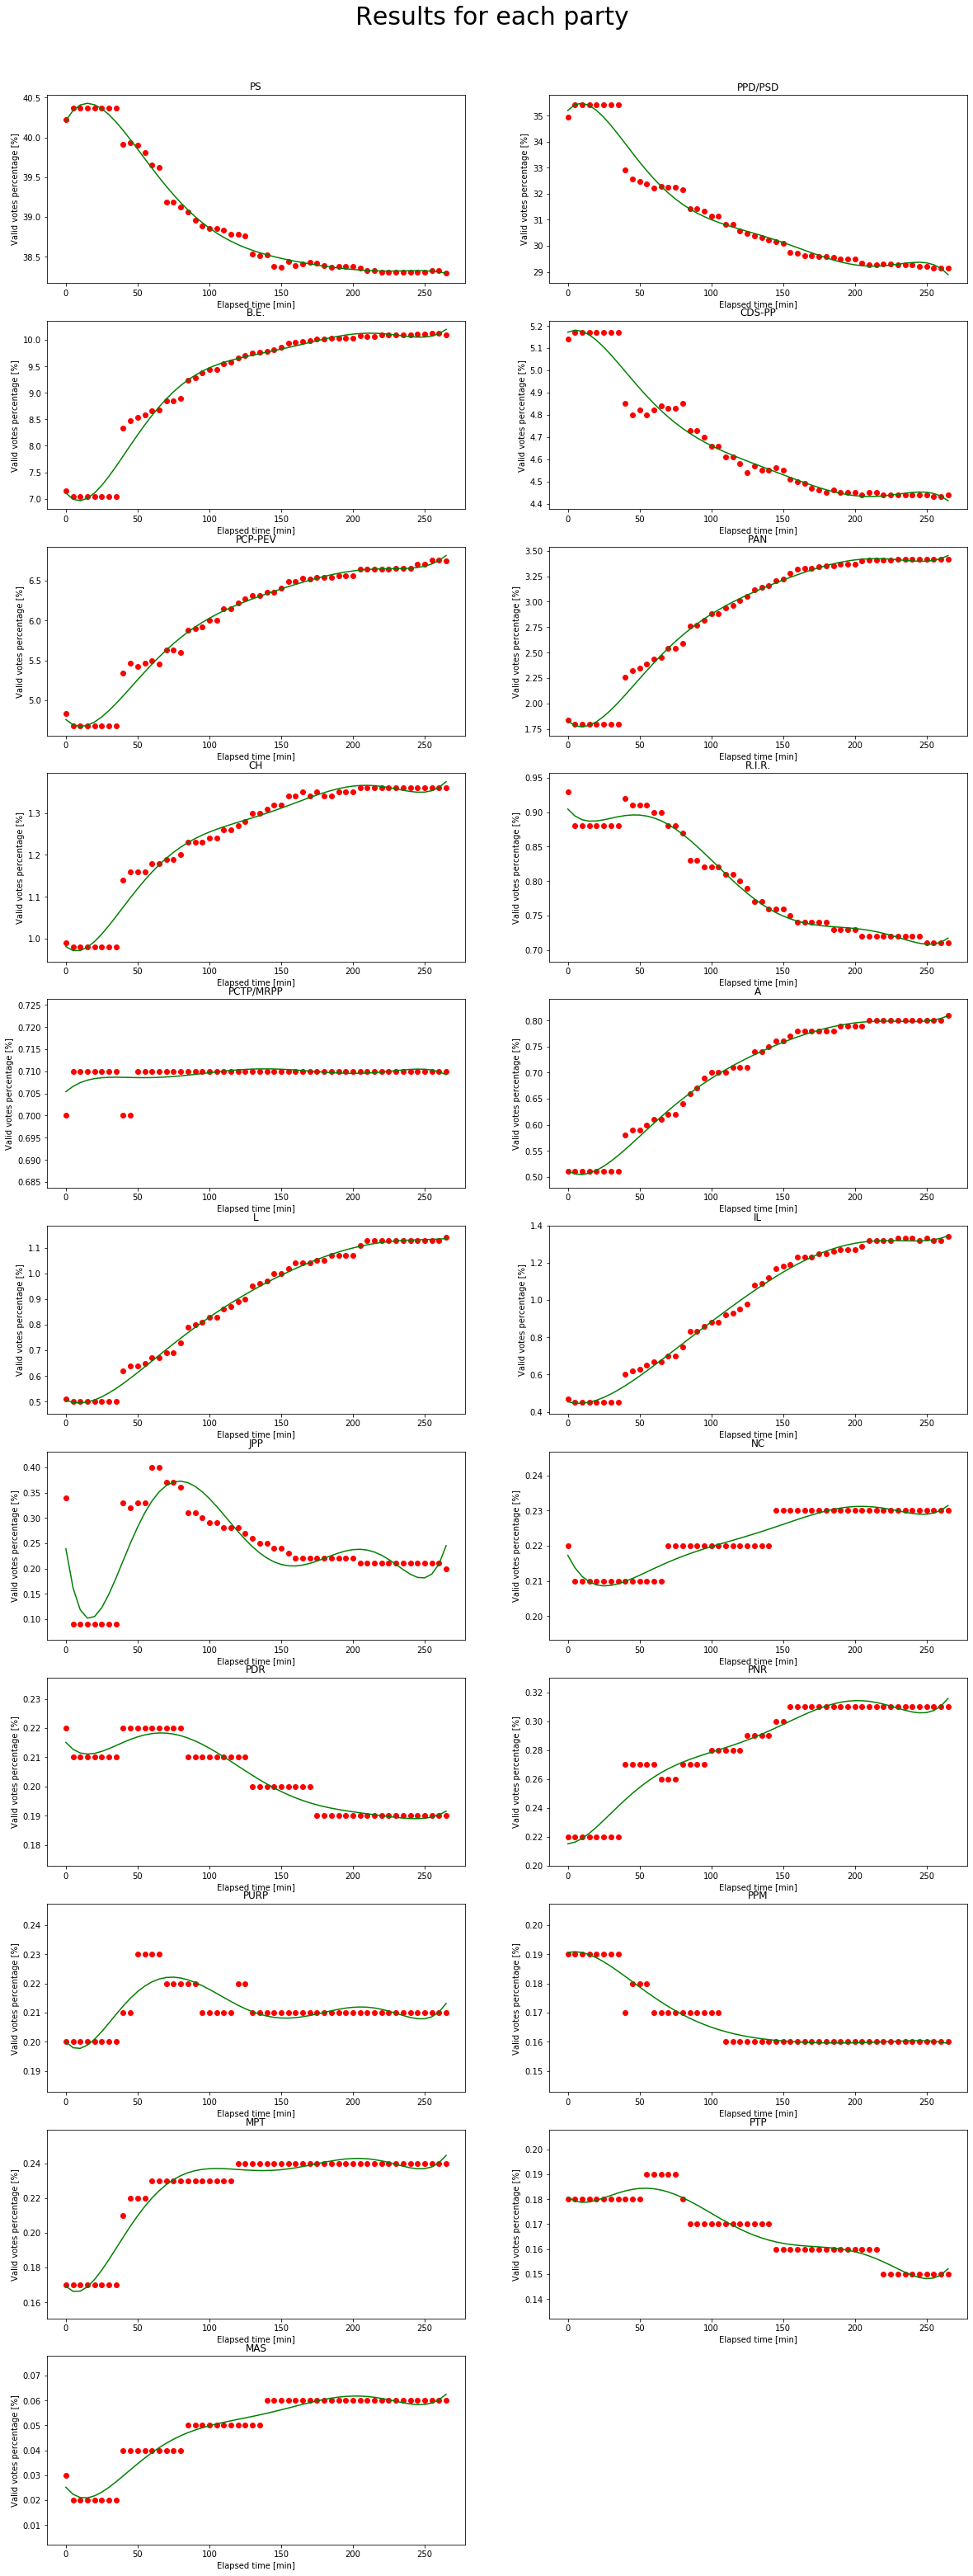

In [193]:
#%matplotlib qt
%matplotlib inline
fig = plt.figure(figsize=(20,50))
plt.suptitle("Results for each party", fontsize=30)

for i in range(21):
    fig.add_subplot(11,2,i+1)
    plt.title(Parties_list[i])
    plt.xlabel("Elapsed time [min]")
    plt.ylabel("Valid votes percentage [%]")
    plt.scatter(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party==Parties_list[i])], data_Terri_Nac.validVotesPercentage[(data_Terri_Nac.Party==Parties_list[i])], c='r')
    plt.plot(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party==Parties_list[i])], MyLinReg(6, np.array(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party==Parties_list[i])]), np.array(data_Terri_Nac.validVotesPercentage[(data_Terri_Nac.Party==Parties_list[i])])), c='g')

plt.subplots_adjust(top = 0.95)

<H5>Napisz algorytm znajdujący najmniejszą liczbę punktów czasowych wymaganych do przewidzenia końcowego wyniku 3 największych partii (PS, PPD/PSD, B./E.) w całym kraju z tolerancją ± 30 mandatów; dobór algorytmu będzie miał wpływ na ocenę ćwiczenia

In [225]:
def Get_y_predicted(Degr, X1, Y1, t):
    x = PolynomialFeatures(degree=Degr).fit_transform(X1.reshape(-1,1))
    R = np.dot(np.linalg.inv(np.dot(x.T,x)), np.dot(x.T,Y1))
    Y_predicted = np.dot(x,R)
    
    T = np.vstack((np.array([1]), t, np.zeros(Degr-1).reshape(-1,1)))
    for i in range(len(T)):
        T[i] = t**i
    Y_pred2 = np.dot(T.T,R)
    return Y_pred2

In [245]:
t = data_Terri_Nac.TimeElapsed.max()

In [249]:
#Algorytm binarny wyszukujący najwcześniejszego punktu w czasie, dla którego przewidziana ilość mandatów mieści się w błędzie
def FindMinElapsedTime(searched_Y, Party, tolerance):
    TimeElapsed = pd.DataFrame(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party==Party)]).to_numpy()
    X1 = np.array(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party==Party)])
    Y1 = np.array(data_Terri_Nac.Mandates[(data_Terri_Nac.Party==Party)])
                       
    start = 0
    stop = TimeElapsed.shape[0]
    
    
    while stop > start:
        mid = (stop - start)//2
        if (searched_Y - tolerance) <= Get_y_predicted(7, X1[mid], Y1[mid], TimeElapsed.shape[0]) and Get_y_predicted(7, X1[mid], Y1[mid], TimeElapsed.shape[0]) <= (searched_Y + tolerance):
            Y_apr = Get_y_predicted(7,X1[mid],Y1[mid],TimeElapsed.shape[0])
            stop = mid
        elif (Get_y_predicted(7, X1, Y1, TimeElapsed[mid]) < (searched_Y - tolerance)):
            start = mid
        else:
            stop = mid
    return stop

In [248]:
Xx = np.array(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party=='PS')])
Yy = np.array(data_Terri_Nac.Mandates[data_Terri_Nac.Party=='PS'])

135

In [226]:
Get_y_predicted(7, Xx, Yy, Tt)

array([104.55284817])

Text(0.5, 1.0, 'PS')

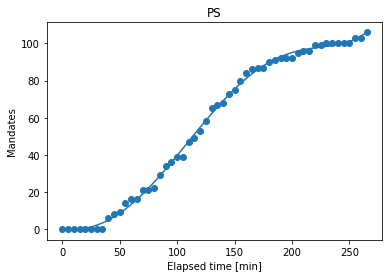

In [195]:
plt.scatter(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party=='PS')], data_Terri_Nac.Mandates[(data_Terri_Nac.Party=='PS')])
plt.plot(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party=='PS')], MyLinReg(6, np.array(data_Terri_Nac.TimeElapsed[(data_Terri_Nac.Party=='PS')]), np.array(data_Terri_Nac.Mandates[(data_Terri_Nac.Party=='PS')] )))
plt.xlabel("Elapsed time [min]")
plt.ylabel("Mandates")
plt.title("PS")

In [192]:
data_Terri_Nac.FinalMandates[(data_Terri_Nac.Party=='PS')][0] #wartość szukana +-30 dla partii 'PS'

106